**Perception in Robotics**

**PS2: Localization**

**Kashirin Aleksandr**

**Landmark localization**

**Task A:**
1. Write the value for the covariance $Q$ of the noise added to the observation function, knowing that the parameter *bearing_std*  is its standard deviation.
2. Write the equation for the covariance $R_t$ of the noise added to the transition function, as explained in class and their corresponding numeric values for the
initial robot command $u = [δ_{rot1} , δ_{trans} , δ_{rot2} ]^⊤ = [0, 10, 0]^⊤$. Find out the default values of $α$ in *run.py* line 152.
3. Derive the equations for the Jacobians $G_t$ , $V_t$ and $H_t$ , and evaluate them at the initial mean state
$µ_1 = [x, y, θ]^⊤ = [180, 50, 0]^⊤$ as it is considered in *run.py*.

Answers:
1. $Q$ - is the covariance matrix of the noise added to the observation function. According to the line 81 in *run.py* default value for the *bearing_std* is 0.35. Also, according to the *tools/data.py*  line 102, $$Q = \begin{pmatrix} \sigma_{bearing}^2 & 0 \\ 0 & 0 \end{pmatrix} = \begin{pmatrix} 0.35^2 & 0 \\ 0 & 0 \end{pmatrix}$$
2. According to the line 79 in *run.py* : $\sqrt{\Alpha} = [0.05, 0.001, 0.05, 0.01]$, where $\Alpha$ is a vector of parameters. Then, according to the line 152 in *run.py* : $\Alpha = [0.05^2, 0.001^2, 0.05^2, 0.01^2]$. Then, in file *tools/task.py*  we can find function *get_motion_noise_covariance*  that calculates covariance matrix $M_t$ of the noise added to the action space with respect to the formula: 
$$M_t = \begin{pmatrix} \alpha_1 \delta_{rot_1}^2 + \alpha_2 \delta_{trans}^2 & 0 & 0\\ 0 & \alpha_3 \delta_{trans}^2 + \alpha_4 (\delta_{rot_1}^2 + \delta_{rot_2}^2) & 0 \\ 0 & 0 & \alpha_1 \delta_{rot_2}^2 + \alpha_2 \delta_{trans}^2\end{pmatrix}$$ 
At the initial step $u = [δ_{rot_1} , δ_{trans} , δ_{rot_2} ]^⊤ = [0, 10, 0]^⊤$, covariance noise added tot the transition function would be: $$M_t = \begin{pmatrix} \alpha_2 \delta_{trans}^2 & 0 & 0\\ 0 & \alpha_3 \delta_{trans}^2 & 0 \\ 0 & 0 & \alpha_2 \delta_{trans}^2\end{pmatrix} = \begin{pmatrix} 0.001^2 * 100 & 0 & 0\\ 0 & 0.05^2 * 100 & 0 \\ 0 & 0 & 0.001^2 * 100\end{pmatrix} = \begin{pmatrix} 0.0001 & 0 & 0\\ 0 & 0.25 & 0 \\ 0 & 0 & 0.0001 \end{pmatrix}$$

To calculate $R_t$ we firstly need to derive $V_t$ from task A.3:
3. $G_t$ - is the jacobian that linearizes input gain matrix $B$  when $B$ is nonlinear with respect to $x_{t-1}$. In our case: 
$$  G_t = \frac{\partial g(x_{t-1}, u_t, \varepsilon_t)}{\partial x_{t-1}} |_{\mu_{t-1}, \varepsilon_t =0} = \begin{bmatrix} 1 & 0 & - \delta_{trans} \sin (\theta + δ_{rot1}) \\ 0 & 1 & \delta_{trans} \cos (\theta + δ_{rot1}) \\ 0 & 0 & 1 \\ \end{bmatrix} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 10 \\ 0 & 0 & 1 \\ \end{bmatrix}$$ 

$V_t$ - is the jacobian that linearizes input gain matrix $B$  when $B$ is nonlinear and noise was accounted in the action space with respect to $u_{t}$. In our case:

$$ V_t = \frac{\partial g(x_{t-1}, u_t, \varepsilon_t)}{\partial u_{t}} |_{\mu_{t-1}, \varepsilon_t =0} = \begin{bmatrix}
    - \delta_{trans} \sin (\theta + δ_{rot1}) & \cos (\theta + δ_{rot1}) & 0 \\
    \delta_{trans} \cos (\theta + δ_{rot1}) & \sin (\theta + δ_{rot1}) & 0 \\
    1 & 0 & 1 \\
\end{bmatrix} = \begin{bmatrix}
    0 & 1 & 0 \\
    10 & 0 & 0 \\
    1 & 0 & 1 \\
\end{bmatrix}$$
 
$H_t$ - is the jacobian that linearizes output gain matrix $C$  when $C$ is nonlinear with respect to $x_{t}$. In our case Output measurement (observation) vector is $y_t = [bearing, ID]^T$ but $\sigma_{ID} = 0$ and then state vector is $x_t = [x, y, θ]^⊤$, so the corresponding equation is: $y = Cx$, hence: 

$$H_t = \frac{\partial h(x_{t})}{\partial x_{t}} |_{\bar{\mu}_{t}} = \begin{bmatrix}
\frac{m_{i,y} - \bar{\mu}_{t,y}}{(m_{i,x} - \bar{\mu}_{t,x})^2 + (m_{i,y} - \bar{\mu_{t,y}})^2} & \frac{- (m_{i,x} - \bar{\mu}_{t,x})}{(m_{i,x} - \bar{\mu}_{t,x})^2 + (m_{i,y} - \bar{\mu_{t,y}})^2} & -1\\
\end{bmatrix}$$

For the sake of simplicity, mathematical derivation of $R_t$ is presented down below:

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy
from tools.task import wrap_angle

# Control variables
np.random.seed(42)  # Predefined random seed
labelsize = 15      # Label font size
titlesize = 20      # Title font size
suptitlesize = 25   # Suptitle font size

In [2]:
# Define symbols
t, x_t, y_t, th_t, x_t1, y_t1, th_t1, drot1, drot2, dtrans = sympy.symbols('t x_t y_t theta_t x_{t-1} y_{t-1} theta_t-1 delta_rot1 delta_rot2 delta_trans')

# Define State Vector
X_t = sympy.Matrix([x_t, y_t, th_t])
X_t1 = sympy.Matrix([x_t1, y_t1, th_t1])

# Define Control Vector
U = sympy.Matrix([drot1, dtrans, drot2])

# Define state transition function
g = sympy.Matrix([[X_t1[0] + U[1]*sympy.cos(X_t1[2] + U[0])], 
                  [X_t1[1] + U[1]*sympy.sin(X_t1[2] + U[0])], 
                  [X_t1[2] + U[0] + U[2]]])

# Define M_t
a1, a2, a3, a4 = sympy.symbols('alpha_1 alpha_2 alpha_3 alpha_4')
M_t = sympy.Matrix([[a1*U[0]**2 + a2*U[1]**2, 0, 0],
                    [0, a3*U[1]**2 + a4*(U[0]**2+U[2]**2), 0],
                    [0, 0, a1*U[2]**2 + a2*U[1]**2]])


def jacobian(a, b):
    """ Function returns jacobian between two given vectors
    Args:
        a - Vector a
        b - Vector b
    
    Returns:
        J - Jacobian of two vectors
    """
    # Get length of vectors
    n = len(a)
    m = len(b)
    # Initialize Jacobian
    J = sympy.zeros(n, m)
    # For each cell in Jacobian
    for i in range(n):
        for j in range(m):
            # Get derivative with related respect
            J[i, j] = a[i].diff(b[j])
    return sympy.simplify(J)

# Print nonlinear transition function
print('Nonlinear transition function g(x_{t-1}, u(t)):')
g

Nonlinear transition function g(x_{t-1}, u(t)):


Matrix([
[delta_trans*cos(delta_rot1 + theta_t-1) + x_{t-1}],
[delta_trans*sin(delta_rot1 + theta_t-1) + y_{t-1}],
[              delta_rot1 + delta_rot2 + theta_t-1]])

In [3]:
print('Jacobian with respect to previous state G_t:')
G_t = jacobian(g, X_t1)
G_t

Jacobian with respect to previous state G_t:


Matrix([
[1, 0, -delta_trans*sin(delta_rot1 + theta_t-1)],
[0, 1,  delta_trans*cos(delta_rot1 + theta_t-1)],
[0, 0,                                        1]])

In [4]:
print('Jacobian with respect to control action V_t:')
V_t = jacobian(g, U)
V_t

Jacobian with respect to control action V_t:


Matrix([
[-delta_trans*sin(delta_rot1 + theta_t-1), cos(delta_rot1 + theta_t-1), 0],
[ delta_trans*cos(delta_rot1 + theta_t-1), sin(delta_rot1 + theta_t-1), 0],
[                                       1,                           0, 1]])

In [5]:
print('Covariance matrix M_t of the noise added to the action space:')
M_t

Covariance matrix M_t of the noise added to the action space:


Matrix([
[alpha_1*delta_rot1**2 + alpha_2*delta_trans**2,                                                                0,                                              0],
[                                             0, alpha_3*delta_trans**2 + alpha_4*(delta_rot1**2 + delta_rot2**2),                                              0],
[                                             0,                                                                0, alpha_1*delta_rot2**2 + alpha_2*delta_trans**2]])

In [6]:
# Calculate R_t = V_t * M_t * V_t^T
print('Covariance matrix R_t of the transformed noise added to the transition function:')
R_t = V_t * M_t * V_t.T
sympy.simplify(R_t)

Covariance matrix R_t of the transformed noise added to the transition function:


Matrix([
[delta_trans**2*(alpha_1*delta_rot1**2 + alpha_2*delta_trans**2)*sin(delta_rot1 + theta_t-1)**2 + (alpha_3*delta_trans**2 + alpha_4*(delta_rot1**2 + delta_rot2**2))*cos(delta_rot1 + theta_t-1)**2,                             (alpha_3*delta_trans**2 + alpha_4*(delta_rot1**2 + delta_rot2**2) - delta_trans**2*(alpha_1*delta_rot1**2 + alpha_2*delta_trans**2))*sin(2*delta_rot1 + 2*theta_t-1)/2, -delta_trans*(alpha_1*delta_rot1**2 + alpha_2*delta_trans**2)*sin(delta_rot1 + theta_t-1)],
[                            (alpha_3*delta_trans**2 + alpha_4*(delta_rot1**2 + delta_rot2**2) - delta_trans**2*(alpha_1*delta_rot1**2 + alpha_2*delta_trans**2))*sin(2*delta_rot1 + 2*theta_t-1)/2, delta_trans**2*(alpha_1*delta_rot1**2 + alpha_2*delta_trans**2)*cos(delta_rot1 + theta_t-1)**2 + (alpha_3*delta_trans**2 + alpha_4*(delta_rot1**2 + delta_rot2**2))*sin(delta_rot1 + theta_t-1)**2,  delta_trans*(alpha_1*delta_rot1**2 + alpha_2*delta_trans**2)*cos(delta_rot1 + theta_t-1)],
[                    

Compute numerically $R_t$ at the initial time:

In [7]:
#Compute numerically R_t
def compute_num(func, params, num_params):
    """ Function perform numerical computation
    
    Args:
        func - Given function or Symbolic matrix to calculate
        params - tuple or list of parameters used in the function
        num_params - Corresponded numerical values of the parameters
    Returns:
        func_num - Numerical computed values of the function
    """
    # Lambdify the given function
    func_num = sympy.lambdify(params, func)
    # Calculate numerical values
    func_num = func_num(*num_params)
    return func_num

# Create symbolic list of parameters
params = (a1, a2, a3, a4, drot1, dtrans, drot2, x_t1, y_t1, th_t1)

# Create corresponded numerical list of parameters
num_params = [0.05**2, 0.001**2, 0.05**2, 0.001**2, 0, 10, 0, 180, 50, 0]

# R_t
R_t_num = compute_num(R_t, params, num_params)
print('Numerical covariance matrix R_t of the transformed noise added to the transition function:')
R_t_num

Numerical covariance matrix R_t of the transformed noise added to the transition function:


array([[ 2.5e-01,  0.0e+00, -0.0e+00],
       [ 0.0e+00,  1.0e-02,  1.0e-03],
       [-0.0e+00,  1.0e-03,  2.0e-04]])

Hence, at the initial time: $$R_t = \begin{bmatrix}
0.25 & 0 & 0\\
0 & 0.01 & 0.001\\
0 & 0.01 & 0.0002\\
\end{bmatrix}$$

**Task B:**
Implement EKF and PF-based robot localization using odometry and bearing-only observations to features in a landmark map.

1. EKF is presented in file `filters/ekf.py`

![](Task_B/ekf.gif)

2. PF is presented in file `filters/pf.py`

![](Task_B/pf_show_particles.gif)

Videos are included in folder `video` as well!

**Task C:** Create plots of pose error versus time i.e., a plot of $x̂ − x$ vs. $t$, $ŷ − y$ vs $t$, and $θ̂ − θ$ vs. $t$ where
$(x̂, ŷ, θ̂)$ is the ﬁlter estimated pose and $(x, y, θ)$ is the ground-truth actual pose known only to the simulator.
Plot the error in blue and in red plot the $±3σ$ uncertainty bounds. Your state error should lie within these
bounds approximately 99.73% of the time (assuming Gaussian statistics). For the PF, use the sample mean
and variance.

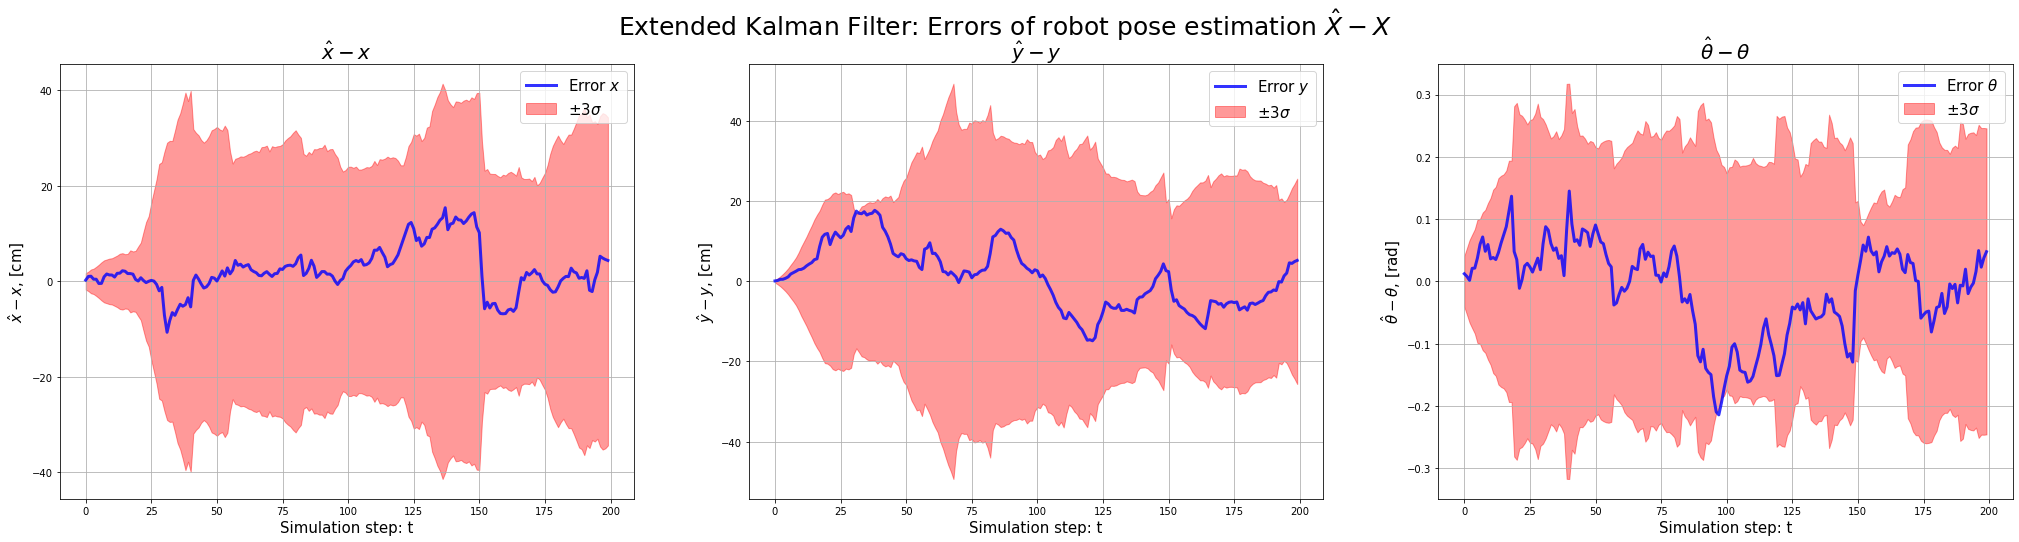

In [8]:
def plot_results(input, output, title):
    ''' Function plots results for tasks C and D
    '''
    # Assign data
    # X mean
    X_hat = output.f.mean_trajectory[:, 0] # Estimated pose X
    X = input.f.real_robot_path[:, 0]      # Real robot position X
    # X std
    X_std = np.sqrt(output.f.covariance_trajectory[0, 0, :])

    # Y mean
    Y_hat = output.f.mean_trajectory[:, 1] # Estimated pose Y
    Y = input.f.real_robot_path[:, 1]      # Real robot position Y
    # Y std
    Y_std = np.sqrt(output.f.covariance_trajectory[1, 1, :])

    # Theta
    Theta_hat = output.f.mean_trajectory[:, 2] # Estimated pose Theta
    Theta = input.f.real_robot_path[:, 2]      # Real robot position Theta
    diff_Theta = np.array([wrap_angle(Theta_hat[i]-Theta[i]) for i in range(len(Theta))])
    # Theta std
    Theta_std = np.sqrt(output.f.covariance_trajectory[2, 2, :])

    t = np.linspace(0, len(X)-1, len(X))

    plt.figure(figsize=[35,8], facecolor='white')
    plt.suptitle(title, fontsize=suptitlesize)

    #X
    plt.subplot(1, 3, 1)
    plt.plot(t, X_hat-X, linewidth=3, color='blue', label='Error $x$', alpha=0.8) # X Mean
    plt.fill_between(t, 3*X_std, -3*X_std, color='red', alpha=0.4, label=r'$\pm 3\sigma$')
    plt.title(r'$\hat{x}-x$', fontsize=titlesize)
    plt.legend(loc='upper right', fontsize=labelsize)
    plt.grid(True)
    plt.xlabel('Simulation step: t', fontsize=labelsize)
    plt.ylabel(r'$\hat{x}-x$, [cm]', fontsize=labelsize)

    #Y
    plt.subplot(1, 3, 2)
    plt.plot(t, Y_hat-Y, linewidth=3, color='blue', label='Error $y$', alpha=0.8) # Y Mean
    plt.fill_between(t, 3*Y_std, -3*Y_std, color='red', alpha=0.4, label=r'$\pm 3\sigma$')
    plt.title(r'$\hat{y}-y$', fontsize=titlesize)
    plt.legend(loc='upper right', fontsize=labelsize)
    plt.grid(True)
    plt.xlabel('Simulation step: t', fontsize=labelsize)
    plt.ylabel(r'$\hat{y}-y$, [cm]', fontsize=labelsize)

    #Theta
    plt.subplot(1, 3, 3)
    plt.plot(t, diff_Theta, linewidth=3, color='blue', label=r'Error $\theta$', alpha=0.8) # Theta Mean
    plt.fill_between(t, 3*Theta_std, -3*Theta_std, color='red', alpha=0.4, label=r'$\pm 3\sigma$')
    plt.title(r'$\hat{\theta}-\theta$', fontsize=titlesize)
    plt.legend(loc='upper right', fontsize=labelsize)
    plt.grid(True)
    plt.xlabel('Simulation step: t', fontsize=labelsize)
    plt.ylabel(r'$\hat{\theta}-\theta$, [rad]', fontsize=labelsize)
    plt.show()

# Load data
ekf_input = np.load('ekf_out/input_data.npy')
ekf_output = np.load('ekf_out/output_data.npy')
# Define title
ekf_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$'

plot_results(ekf_input, ekf_output, ekf_title)

**Conclusion:** As was expected, an estimation error lays within $\pm 3\sigma$ interval.

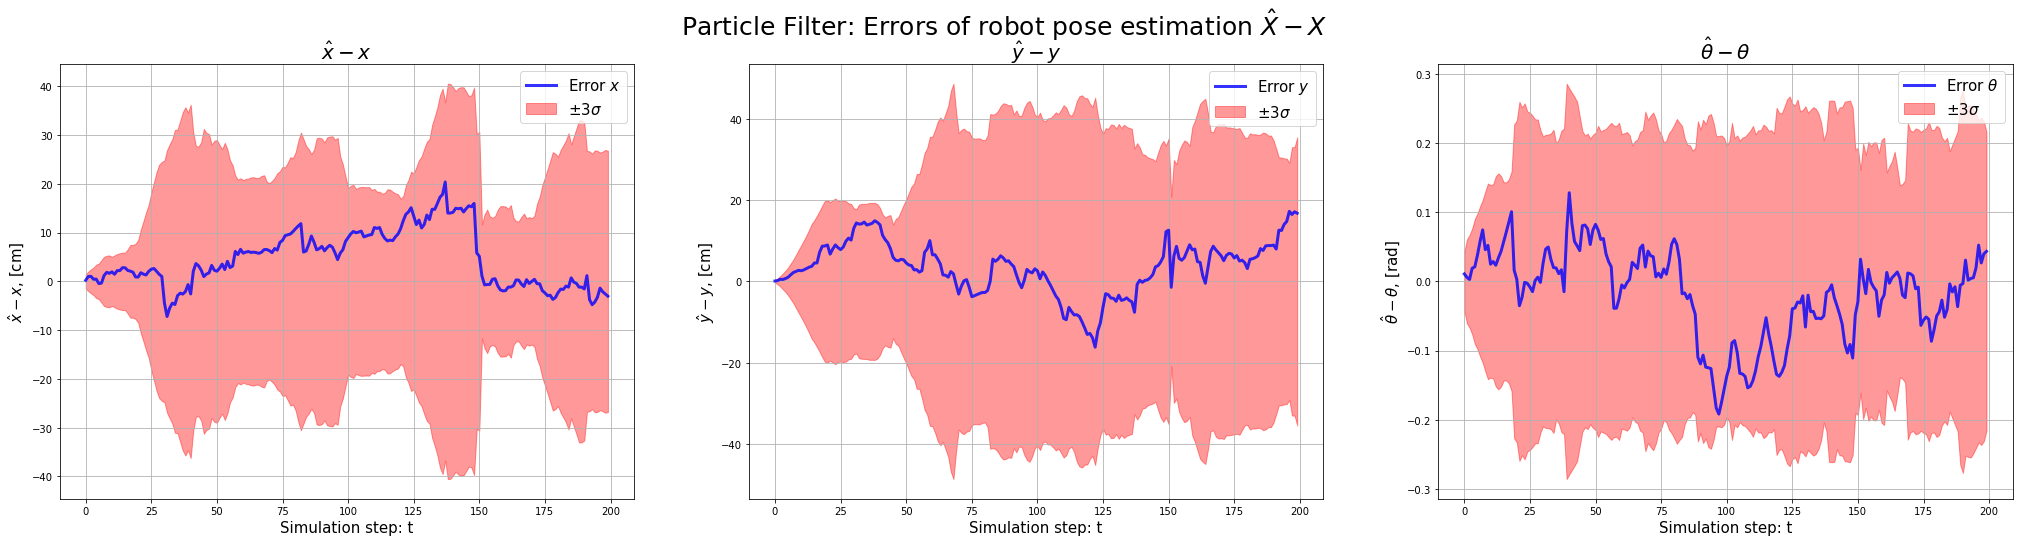

In [9]:
# Load data
pf_input = np.load('pf_out/input_data.npy')
pf_output = np.load('pf_out/output_data.npy')
# Define title
pf_title = r'Particle Filter: Errors of robot pose estimation $\hat{X} - X$'

plot_results(pf_input, pf_output, pf_title)

**Conclusion:** As was expected, an estimation error lays within $\pm 3\sigma$ interval.

**Task D:** Once your ﬁlters are implemented, please investigate some properties of them. How do they behave
* as the sensor or motion noise go toward zero? (Please provide plots and explanation)
* as the number of particles decrease?
* if the ﬁlter noise parameters underestimate or overestimate the true noise parameters? Please clarify
what underestimation and overestimation of noise is?

(Items 1 and 3 are for EKF and "the noise" refers to both observation and control noises)

1. How does EKF behaves when motion noise $R_t$ goes towards zero?

Let us assume following sets of motion noise constants in order to investigate properties of EKF:

Set 1: $ \alpha = 0.8 \cdot [0.05, 0.001, 0.05, 0.01] $

Set 2: $ \alpha = 0.2 \cdot [0.05, 0.001, 0.05, 0.01] $

Set 3: $ \alpha = 0 \cdot [0.05, 0.001, 0.05, 0.01] $

We can obtain data with following commands:
```
python run.py --animate -s -f ekf -n 200 -a 0.04 0.0008 0.04 0.008  -o Task_D/Experiment_1/Motion_Noise/set_1
python run.py --animate -s -f ekf -n 200 -a 0.01 0.0002 0.01 0.002  -o Task_D/Experiment_1/Motion_Noise/set_2
python run.py --animate -s -f ekf -n 200 -a 0.0 0.0 0.0 0.0  -o Task_D/Experiment_1/Motion_Noise/set_3
```

Let us plot graphs in order to investigate properties of the filter.

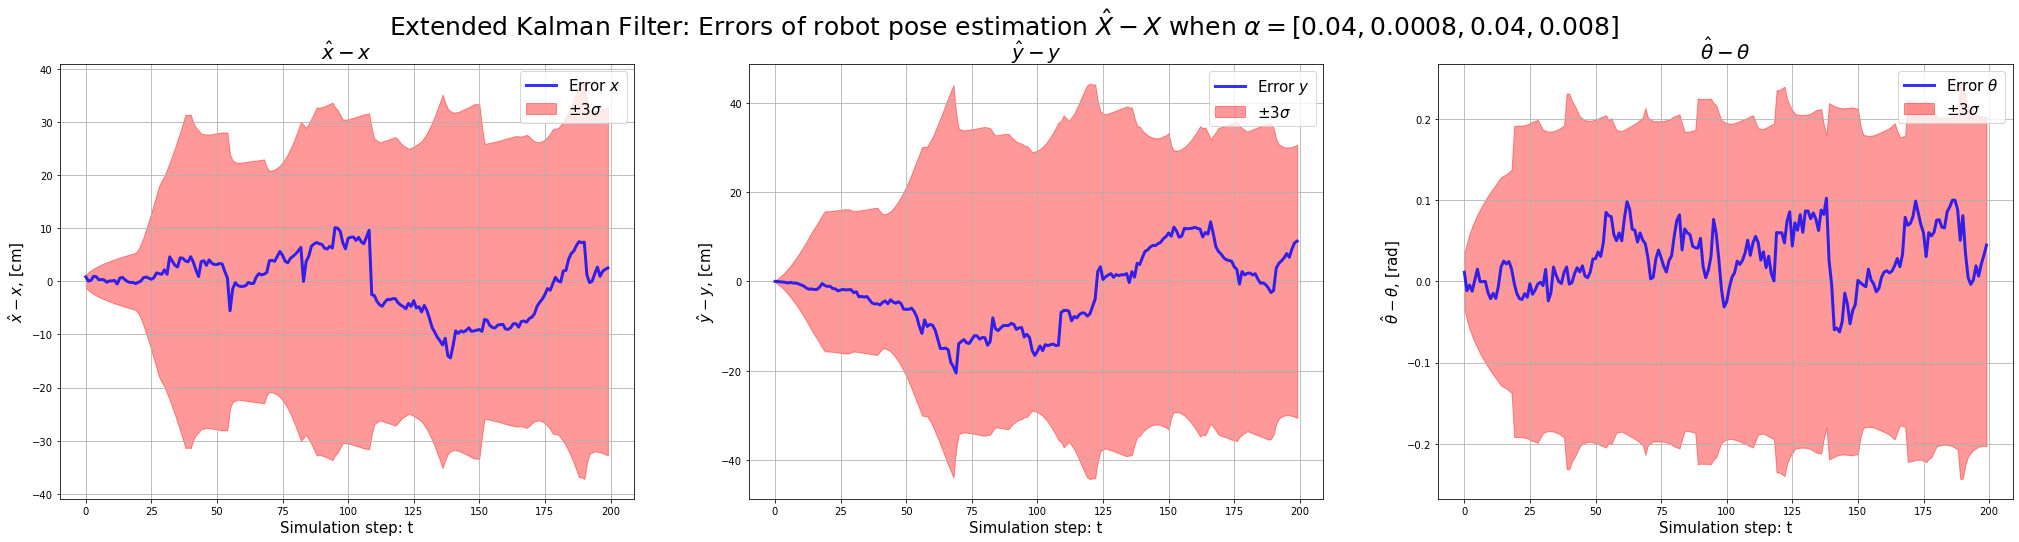

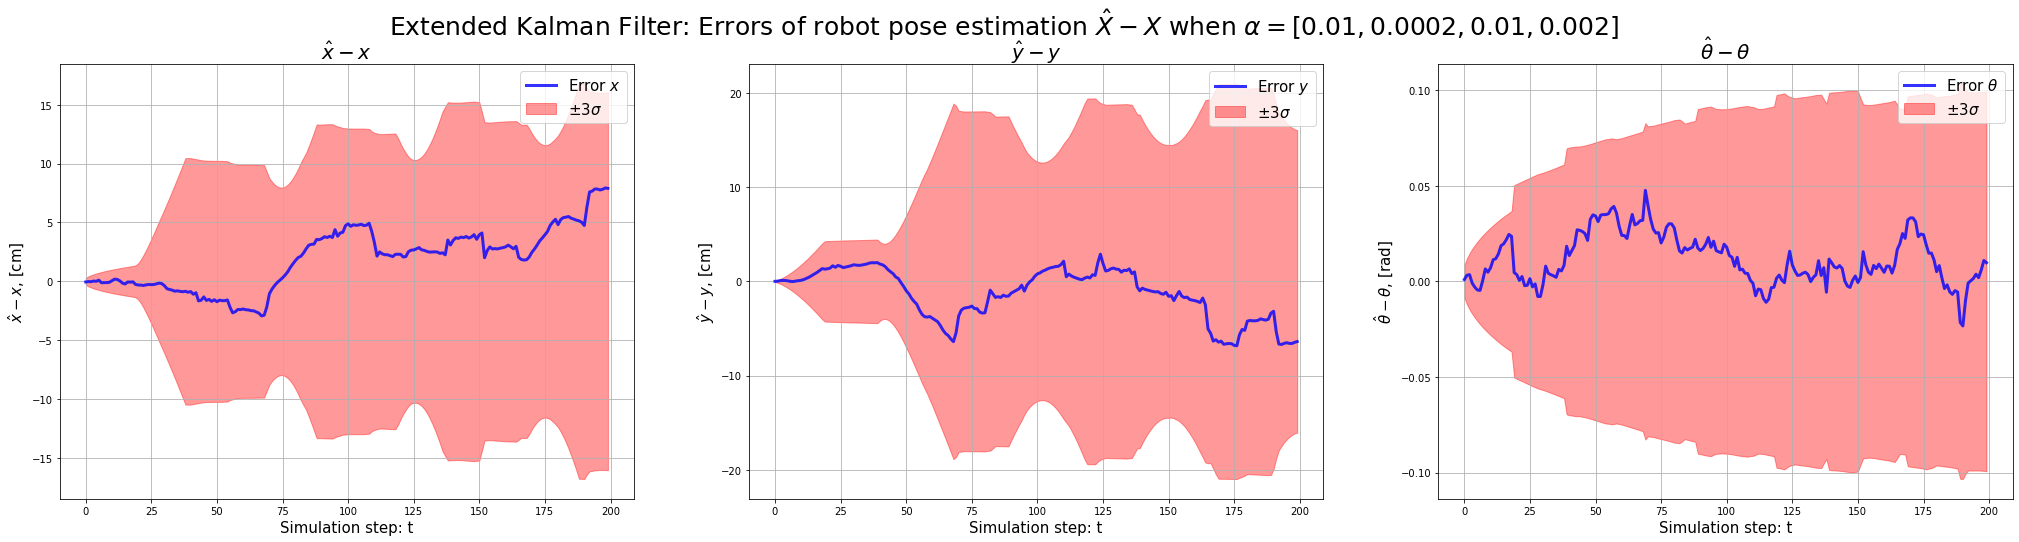

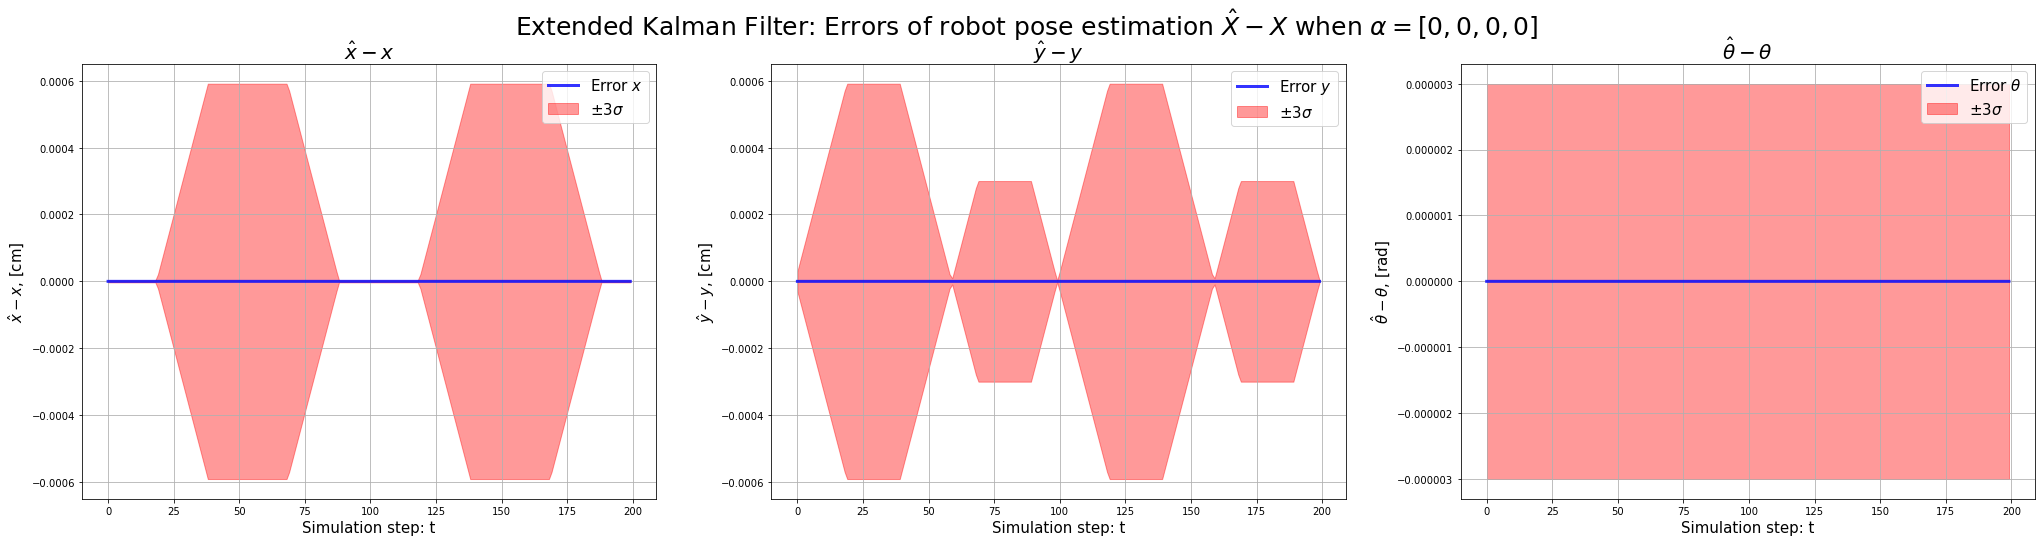

In [10]:
# Set_1 Load data
ex_1_mn_set_1_input = np.load('Task_D/Experiment_1/Motion_Noise/set_1/input_data.npy')
ex_1_mn_set_1_output = np.load('Task_D/Experiment_1/Motion_Noise/set_1/output_data.npy')
# Define title
ex_1_mn_set_1_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $\alpha=[0.04, 0.0008, 0.04, 0.008]$'

plot_results(ex_1_mn_set_1_input, ex_1_mn_set_1_output, ex_1_mn_set_1_title)

# Set_2 Load data
ex_1_mn_set_2_input = np.load('Task_D/Experiment_1/Motion_Noise/set_2/input_data.npy')
ex_1_mn_set_2_output = np.load('Task_D/Experiment_1/Motion_Noise/set_2/output_data.npy')
# Define title
ex_1_mn_set_2_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $\alpha=[0.01, 0.0002, 0.01, 0.002]$'

plot_results(ex_1_mn_set_2_input, ex_1_mn_set_2_output, ex_1_mn_set_2_title)

# Set_3 Load data
ex_1_mn_set_3_input = np.load('Task_D/Experiment_1/Motion_Noise/set_3/input_data.npy')
ex_1_mn_set_3_output = np.load('Task_D/Experiment_1/Motion_Noise/set_3/output_data.npy')
# Define title
ex_1_mn_set_3_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $\alpha=[0, 0, 0, 0]$'

plot_results(ex_1_mn_set_3_input, ex_1_mn_set_3_output, ex_1_mn_set_3_title)

**Conclusion:** As we can see, the $\pm 3\sigma$ interval becomes less and hence the uncertainty in position estimation decreases.

2. How does EKF behaves when motion noise $Q_t$ goes towards zero?

Let us assume following sets of measurement noise constants in order to investigate properties of EKF:

Set 1: $ Q_1 = 0.15^2 $

Set 2: $ Q_2 = 0.08^2 $

Set 3: $ Q_3 = 0 $

We can obtain data with following commands:
```
python run.py --animate -s -f ekf -n 200 -b 0.15 -o Task_D/Experiment_1/Obsv_Noise/set_1
python run.py --animate -s -f ekf -n 200 -b 0.08 -o Task_D/Experiment_1/Obsv_Noise/set_2
python run.py --animate -s -f ekf -n 200 -b 0.0 -o Task_D/Experiment_1/Obsv_Noise/set_3
```

Let us plot graphs in order to investigate properties of the filter.

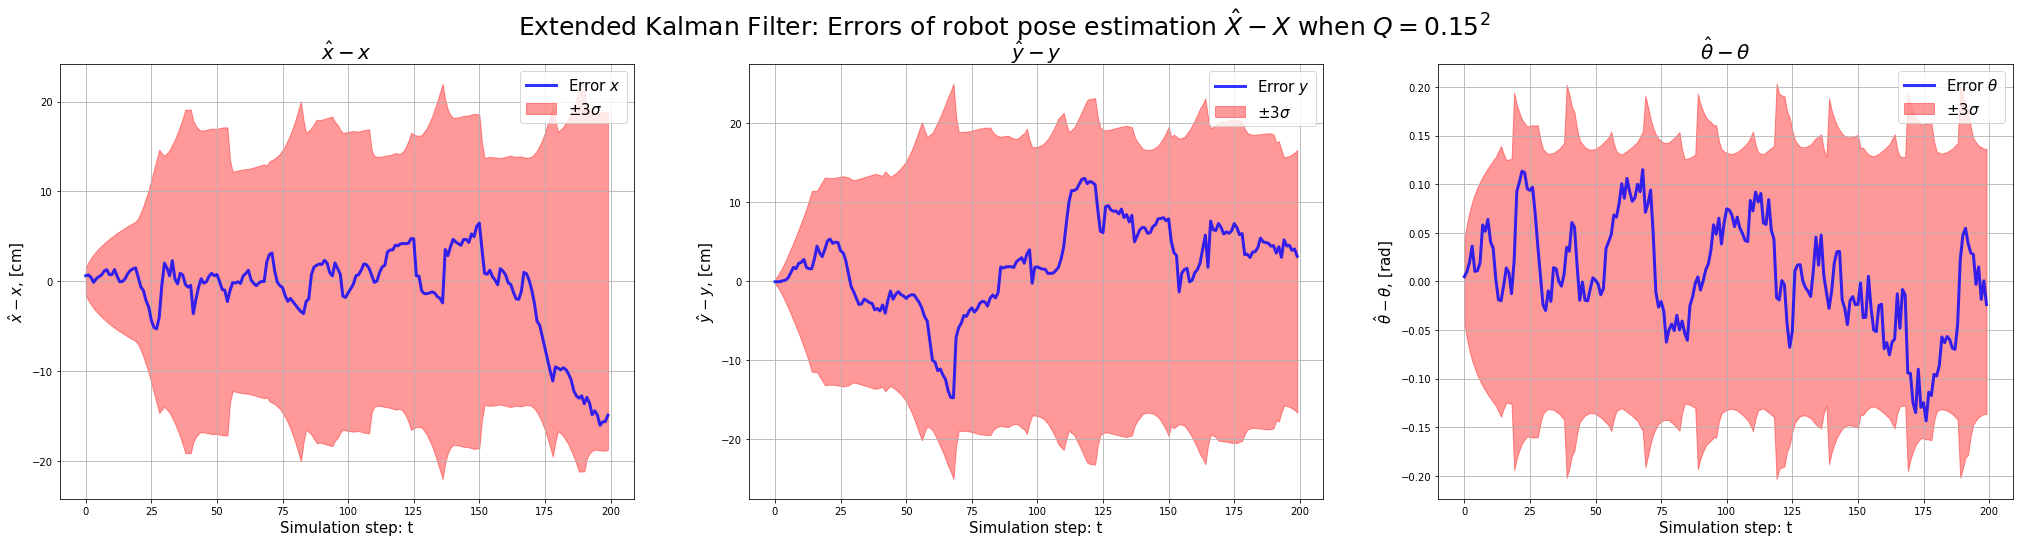

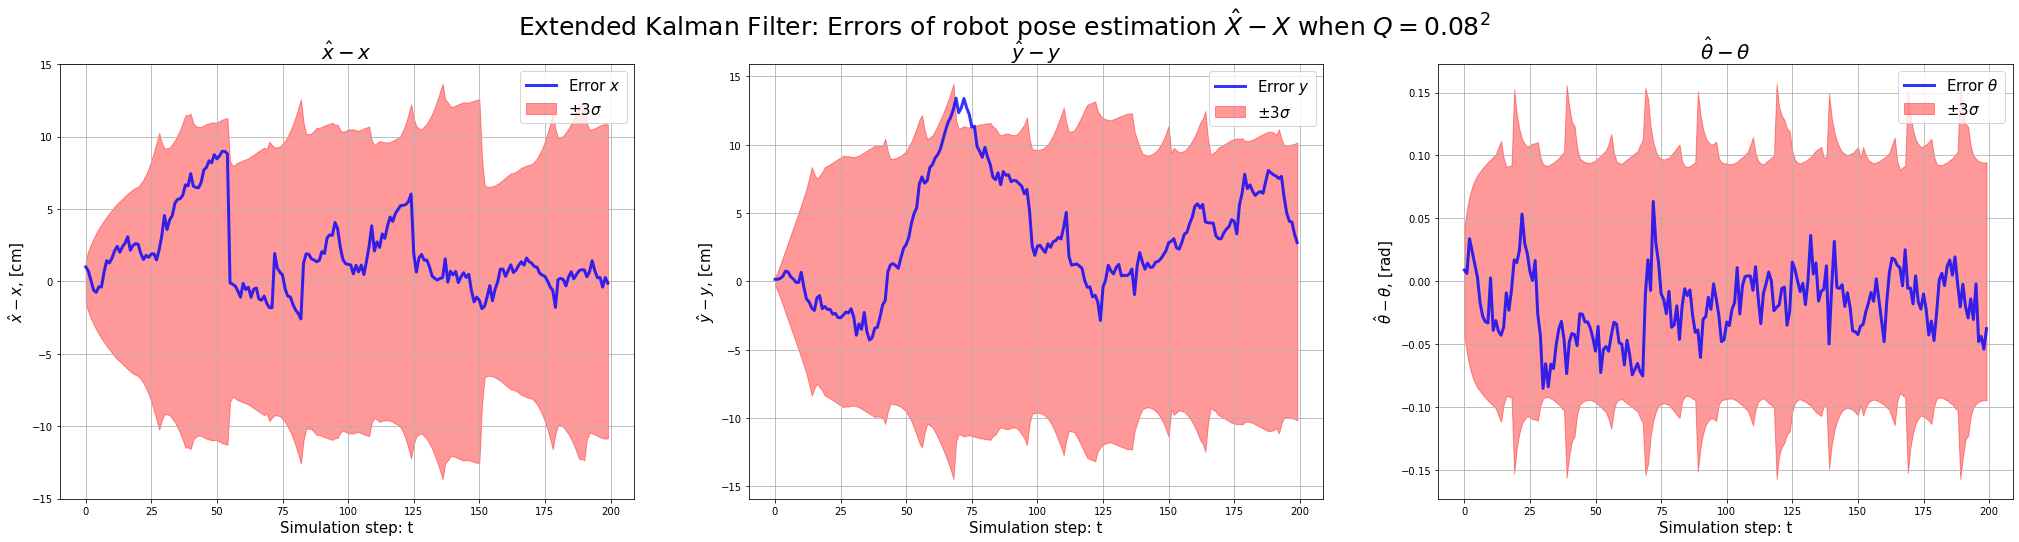

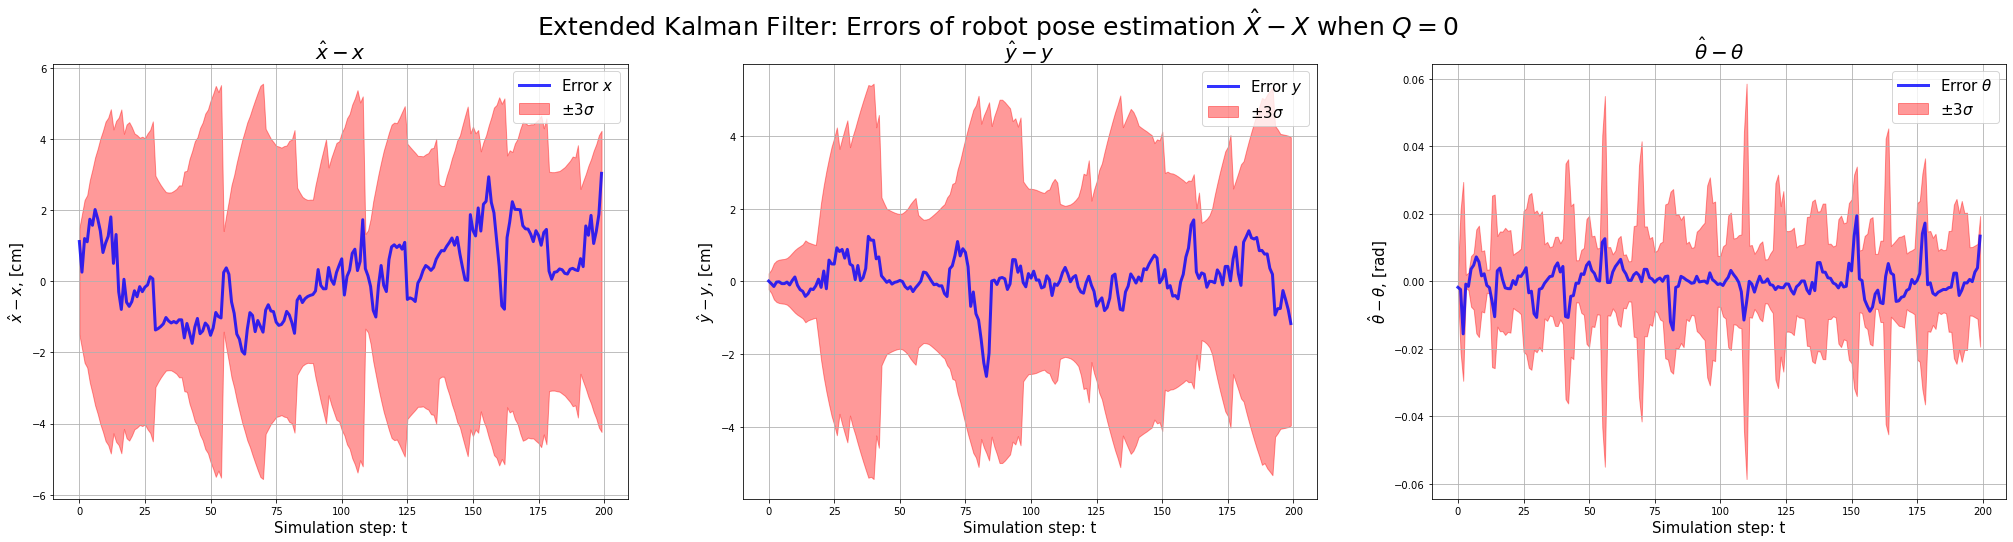

In [11]:
# Set_1 Load data
ex_1_on_set_1_input = np.load('Task_D/Experiment_1/Obsv_Noise/set_1/input_data.npy')
ex_1_on_set_1_output = np.load('Task_D/Experiment_1/Obsv_Noise/set_1/output_data.npy')
# Define title
ex_1_on_set_1_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $Q=0.15^2$'

plot_results(ex_1_on_set_1_input, ex_1_on_set_1_output, ex_1_on_set_1_title)

# Set_2 Load data
ex_1_on_set_2_input = np.load('Task_D/Experiment_1/Obsv_Noise/set_2/input_data.npy')
ex_1_on_set_2_output = np.load('Task_D/Experiment_1/Obsv_Noise/set_2/output_data.npy')
# Define title
ex_1_on_set_2_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $Q=0.08^2$'

plot_results(ex_1_on_set_2_input, ex_1_on_set_2_output, ex_1_on_set_2_title)

# Set_3 Load data
ex_1_on_set_3_input = np.load('Task_D/Experiment_1/Obsv_Noise/set_3/input_data.npy')
ex_1_on_set_3_output = np.load('Task_D/Experiment_1/Obsv_Noise/set_3/output_data.npy')
# Define title
ex_1_on_set_3_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when $Q=0$'

plot_results(ex_1_on_set_3_input, ex_1_on_set_3_output, ex_1_on_set_3_title)

**Conclusion:** Here we can also see that uncertainty decreases, but since we still have motion noise than can not absolutely rely on measurements and eleminate estimation errors.

3. How does PF behaves when  amount of particles is decreased ?

Let us assume following sets of number of particles in order to investigate properties of PF:

Set 1: `num_particles`$ = 50$

Set 2: `num_particles`$ = 10$

We can obtain data with following commands:
```
python run.py --animate -s -f pf -n 200 --num-particles 50 -o Task_D/Experiment_2/set_1
python run.py --animate -s -f pf -n 200 --num-particles 10 -o Task_D/Experiment_2/set_2
```

Let us plot graphs in order to investigate properties of the filter.

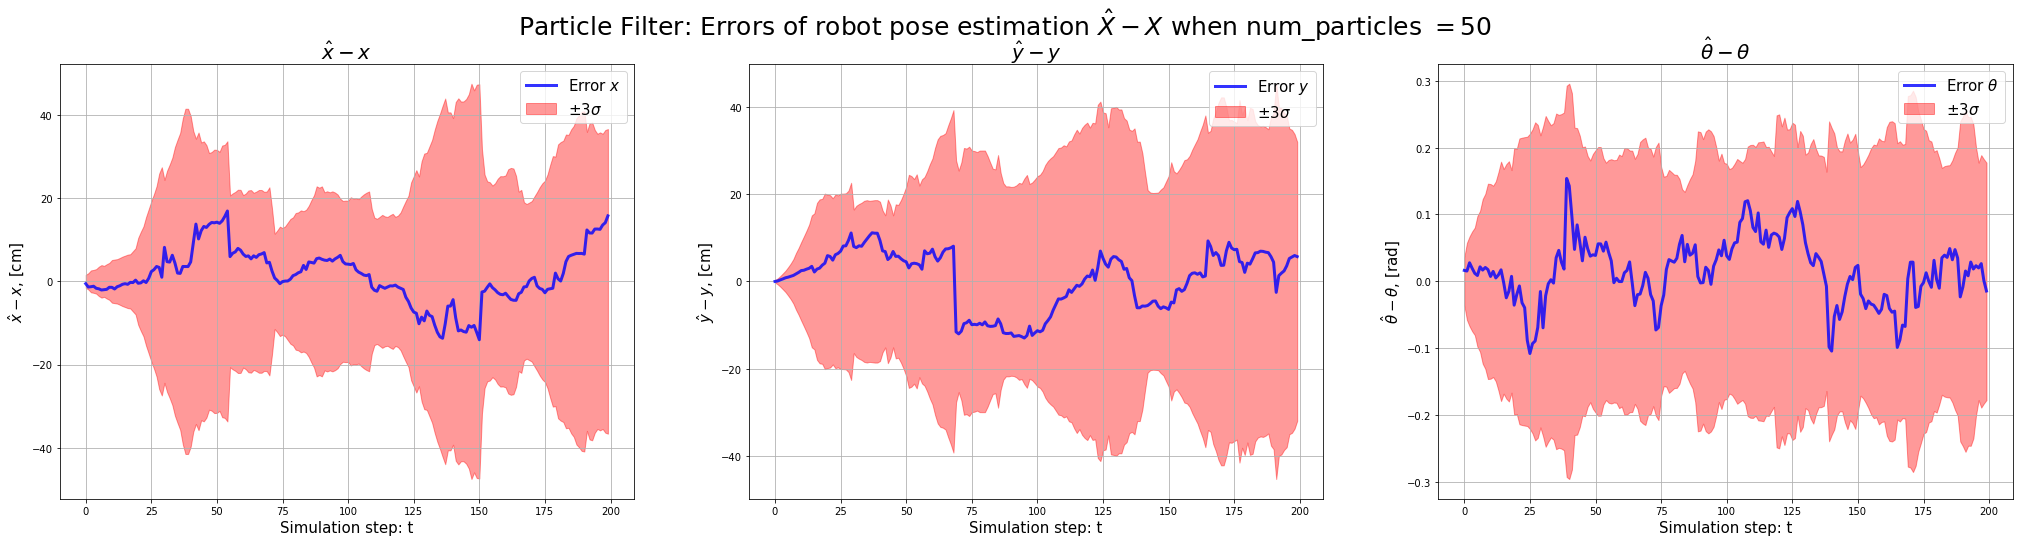

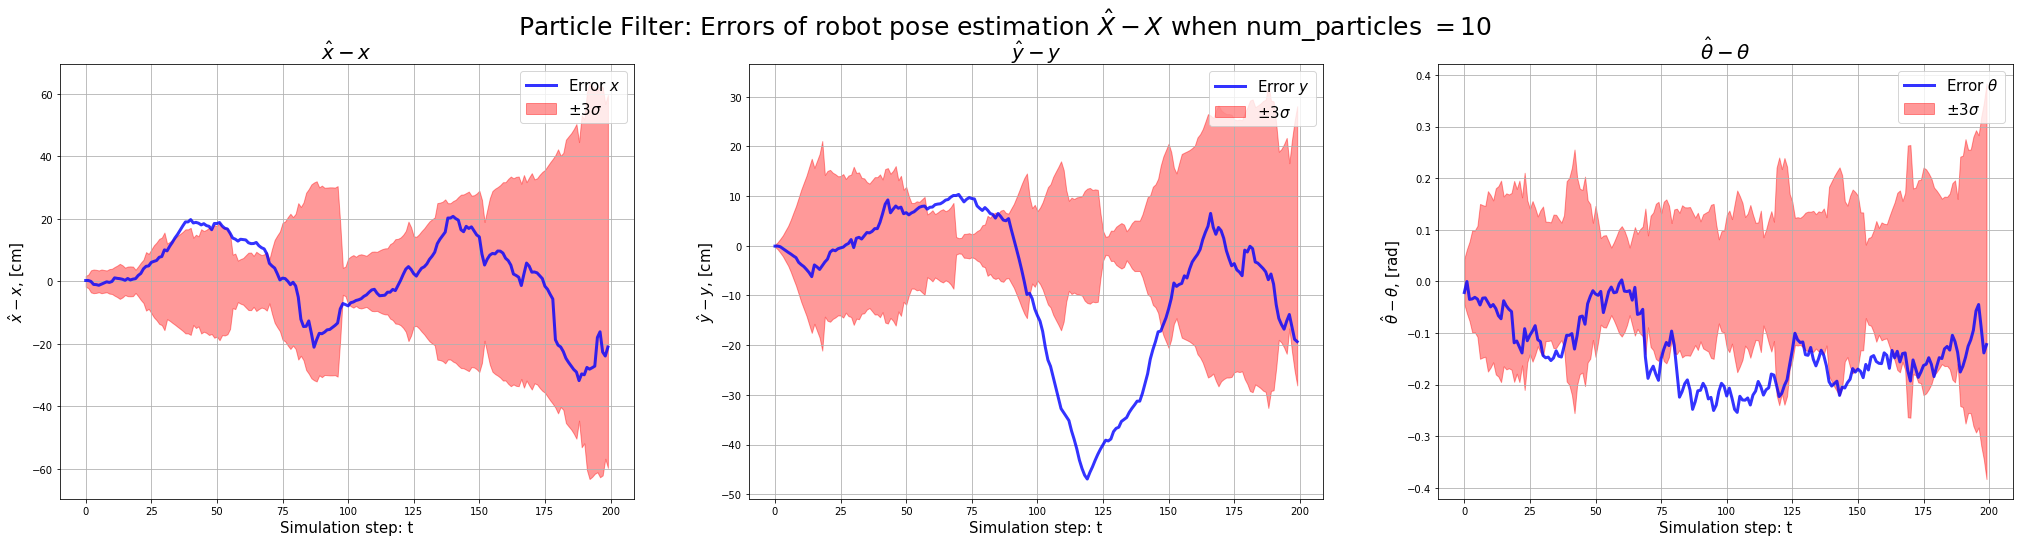

In [12]:
# Set_1 Load data
ex_2_set_1_input = np.load('Task_D/Experiment_2/set_1/input_data.npy')
ex_2_set_1_output = np.load('Task_D/Experiment_2/set_1/output_data.npy')
# Define title
ex_2_set_1_title = r'Particle Filter: Errors of robot pose estimation $\hat{X} - X$ when num_particles $= 50$'

plot_results(ex_2_set_1_input, ex_2_set_1_output, ex_2_set_1_title)

# Set_2 Load data
ex_2_set_2_input = np.load('Task_D/Experiment_2/set_2/input_data.npy')
ex_2_set_2_output = np.load('Task_D/Experiment_2/set_2/output_data.npy')
# Define title
ex_2_set_2_title = r'Particle Filter: Errors of robot pose estimation $\hat{X} - X$ when num_particles $= 10$'

plot_results(ex_2_set_2_input, ex_2_set_2_output, ex_2_set_2_title)

**Conclusion:** As we can see, when number of particles is extremely decreased, we can not provide a good estimation, since the distribution of particles tells us wrong localaziton information.

4. How does EKF behaves when we underestimate or overestimate filter parameters Q and R?

Let us assume following sets in order to investigate properties of EKF:

Motion noise:

Set 1: $ \alpha = 2 \cdot [0.05, 0.001, 0.05, 0.01] $ - Overestimated motion noise

Set 2: $ \alpha = 0.5 \cdot [0.05, 0.001, 0.05, 0.01] $ - Underestimated motion noise

Observation noise:

Set 1: $ Q_1 = 0.6^2 $ - Overestimated measurement noise

Set 2: $ Q_2 = 0.1^2 $ - Underestimated measurement noise

We can obtain data with following commands:
```
python run.py --animate -s -f ekf -n 200 -o Task_D/Experiment_3/Motion_Noise/set_1
python run.py --animate -s -f ekf -n 200 -o Task_D/Experiment_3/Motion_Noise/set_2
python run.py --animate -s -f ekf -n 200 -o Task_D/Experiment_3/Obsv_Noise/set_1
python run.py --animate -s -f ekf -n 200 -o Task_D/Experiment_3/Obsv_Noise/set_2
```

Let us plot graphs in order to investigate properties of the filter.

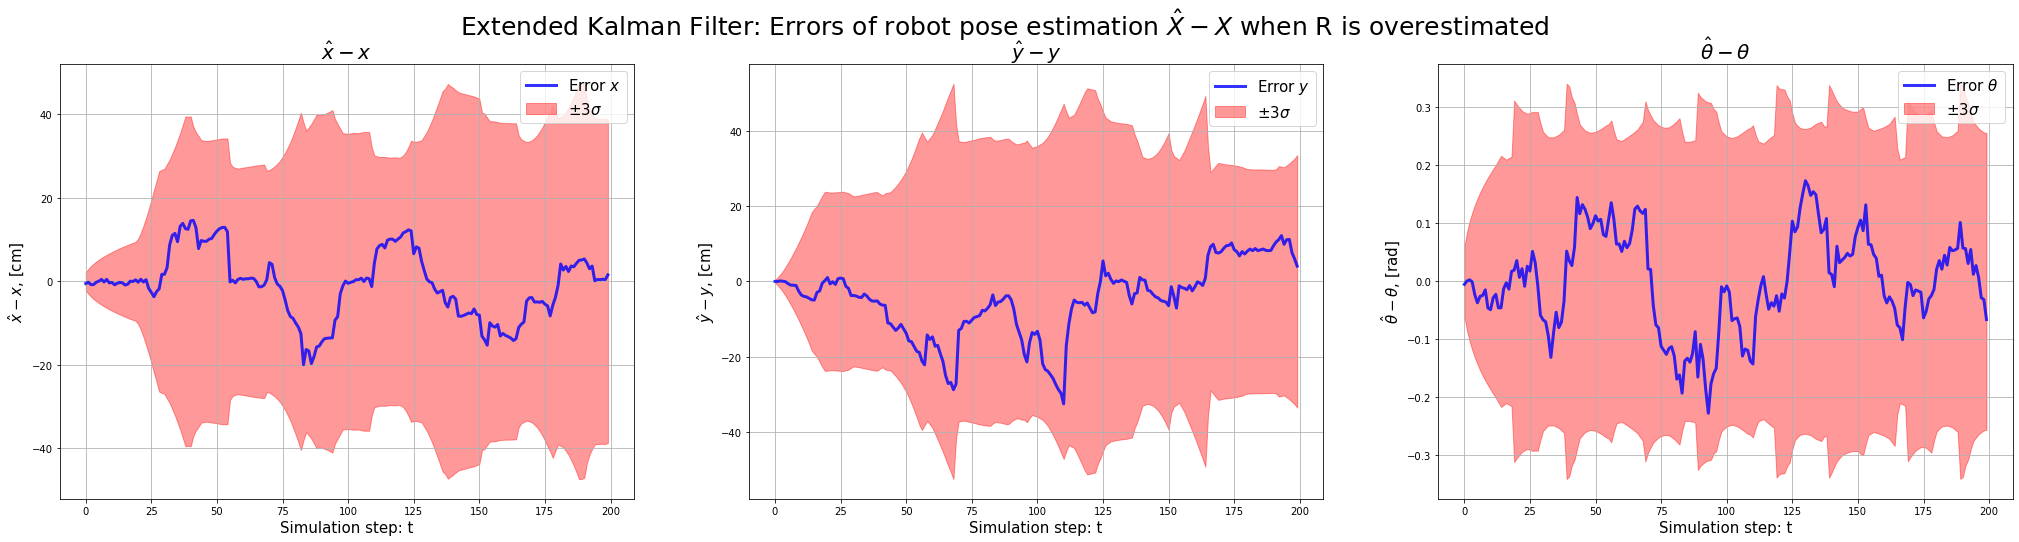

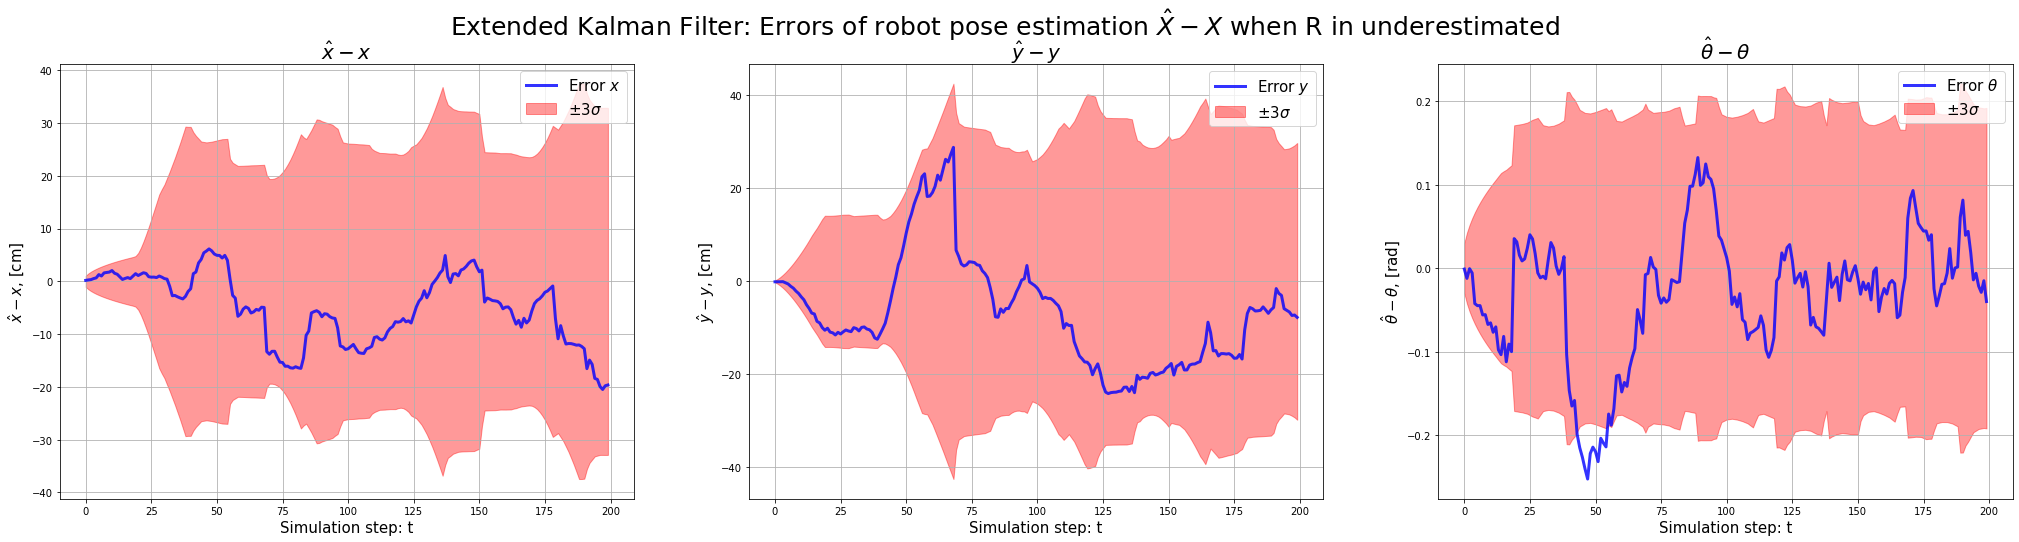

In [13]:
# Set_1 Load data
ex_3_mn_set_1_input = np.load('Task_D/Experiment_3/Motion_Noise/set_1/input_data.npy')
ex_3_mn_set_1_output = np.load('Task_D/Experiment_3/Motion_Noise/set_1/output_data.npy')
# Define title
ex_3_mn_set_1_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when R is overestimated'

plot_results(ex_3_mn_set_1_input, ex_3_mn_set_1_output, ex_3_mn_set_1_title)

# Set_2 Load data
ex_3_mn_set_2_input = np.load('Task_D/Experiment_3/Motion_Noise/set_2/input_data.npy')
ex_3_mn_set_2_output = np.load('Task_D/Experiment_3/Motion_Noise/set_2/output_data.npy')
# Define title
ex_3_mn_set_2_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when R in underestimated'

plot_results(ex_3_mn_set_2_input, ex_3_mn_set_2_output, ex_3_mn_set_2_title)

**Conclusion:** Underestimation or overestimation of the motion noise does not much affect the perfomance of EKF. In case of overestimation we have a bit higher convergence of Filter perfomance and higher sigma gap of possible estimation values. 

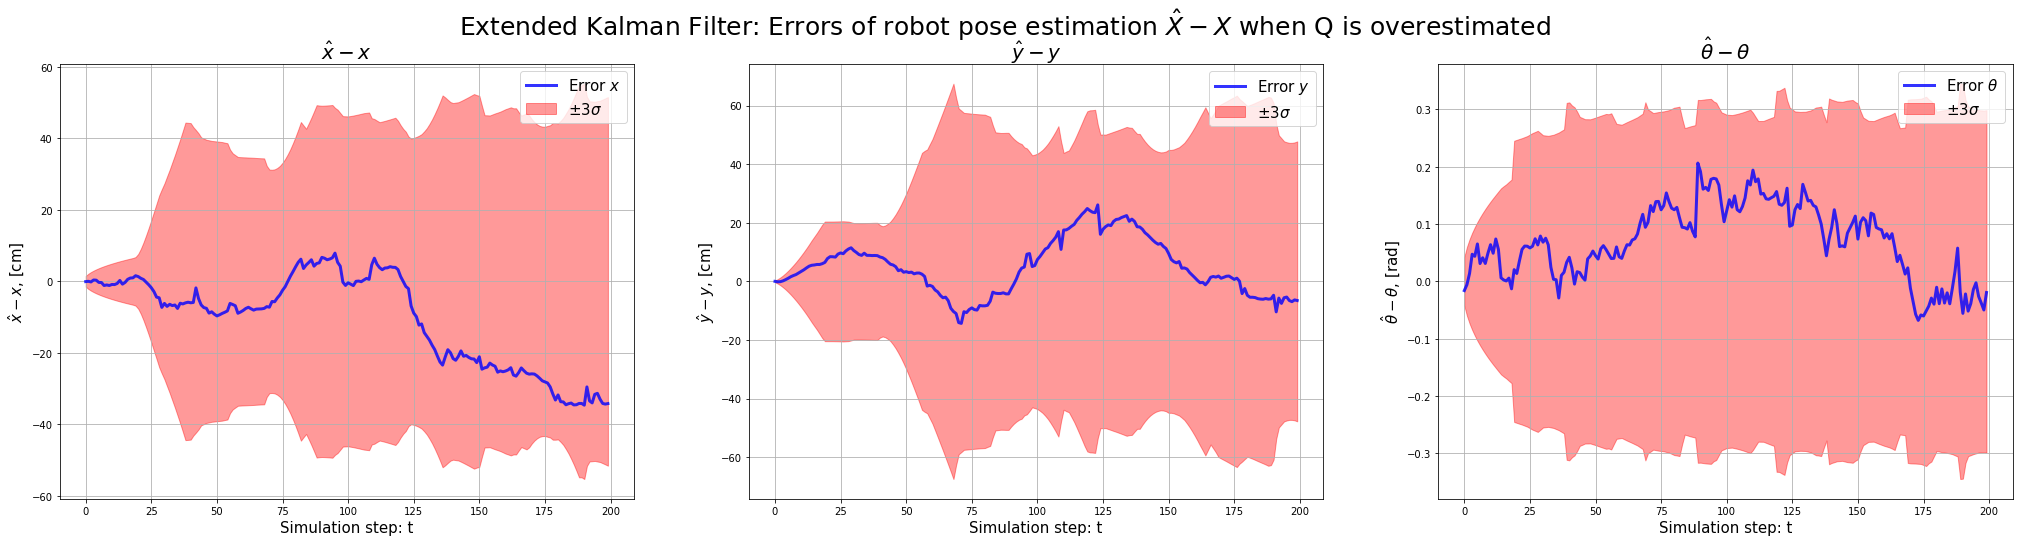

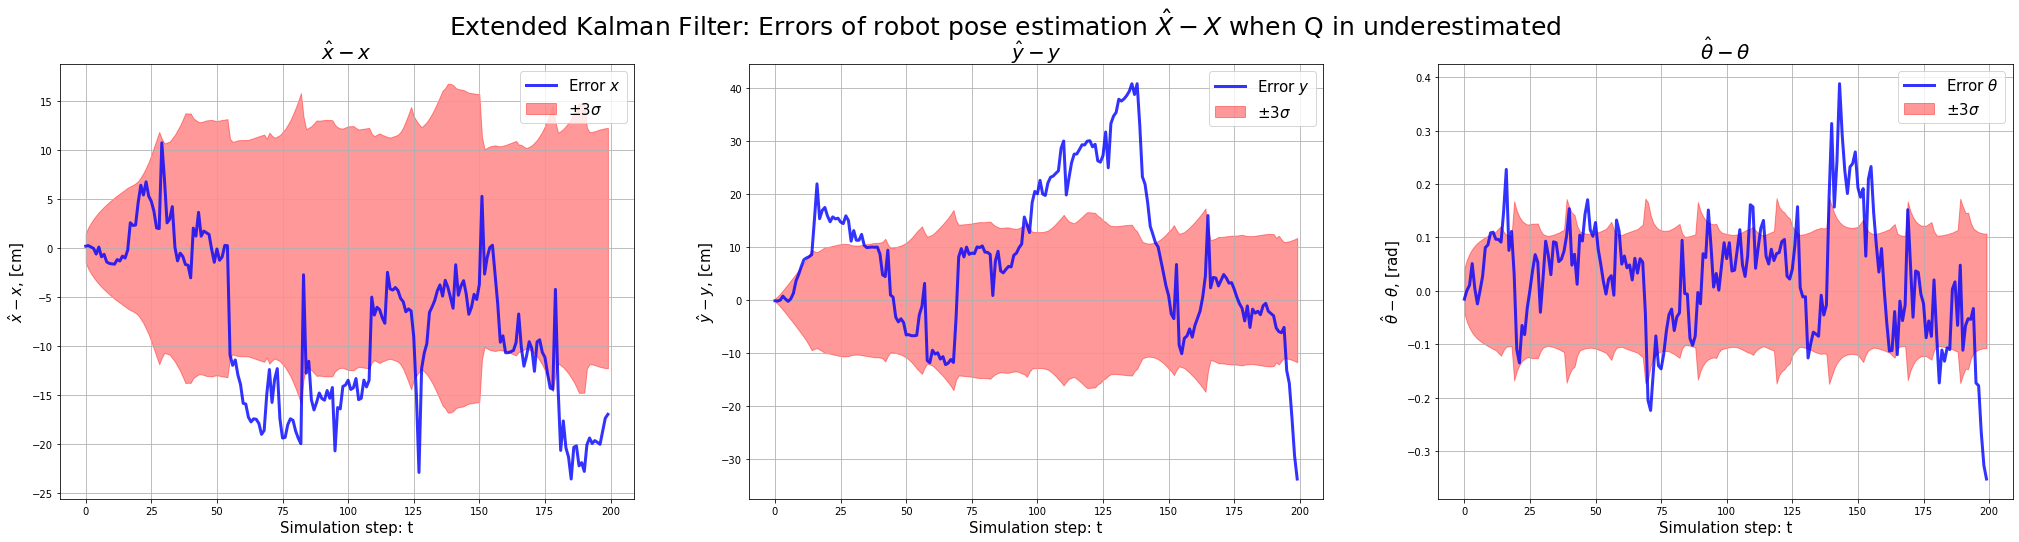

In [14]:
# Set_1 Load data
ex_3_on_set_1_input = np.load('Task_D/Experiment_3/Obsv_Noise/set_1/input_data.npy')
ex_3_on_set_1_output = np.load('Task_D/Experiment_3/Obsv_Noise/set_1/output_data.npy')
# Define title
ex_3_on_set_1_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when Q is overestimated'

plot_results(ex_3_on_set_1_input, ex_3_on_set_1_output, ex_3_on_set_1_title)

# Set_2 Load data
ex_3_on_set_2_input = np.load('Task_D/Experiment_3/Obsv_Noise/set_2/input_data.npy')
ex_3_on_set_2_output = np.load('Task_D/Experiment_3/Obsv_Noise/set_2/output_data.npy')
# Define title
ex_3_on_set_2_title = r'Extended Kalman Filter: Errors of robot pose estimation $\hat{X} - X$ when Q in underestimated'

plot_results(ex_3_on_set_2_input, ex_3_on_set_2_output, ex_3_on_set_2_title)

**Conclusion:** Here, in the case of overestimation, we got the results of increased $\sigma$ gap of possible estimation values. In case of underestimation, we have obtained incorrect estimation results. Hence, it is better to overestimate than underestimate the noise parameters.